# PCA pojednostavljena

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
%matplotlib inline

In [2]:
err = 0.1

x = np.linspace(2, 5, 100)
y = 2+0.5*x+2*err*np.random.rand(len(x))-err

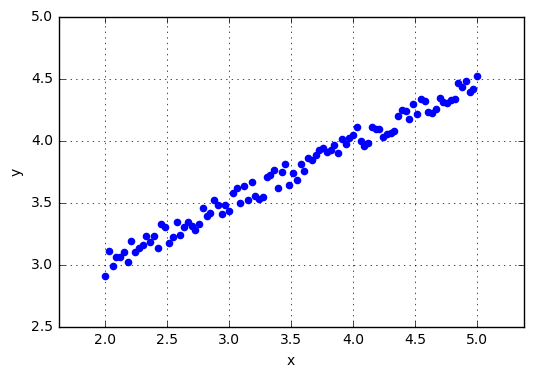

In [3]:
plt.scatter(x, y, color='b');
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

In [4]:
xx = np.zeros((len(x), 2)) 
xx[:, 0] = x
xx[:, 1] = y

In [5]:
xx = xx - xx.mean(axis=0)

In [6]:
n = xx.shape[0]
a = xx-np.dot(np.ones((n,n)),xx)/n

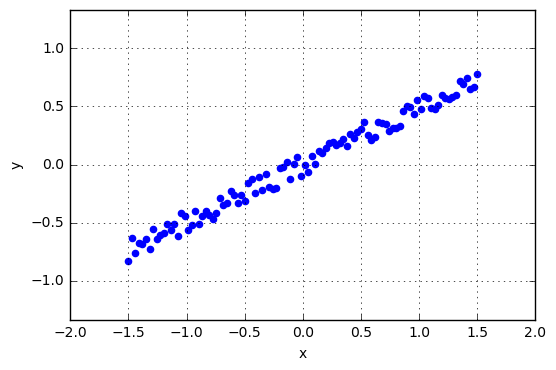

In [7]:
plt.scatter(xx[:,0], xx[:,1], color='b');
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

In [8]:
# covariance matrix
cm = np.dot(a.T, a)

print cm

[[ 76.51515152  37.46190101]
 [ 37.46190101  18.6798077 ]]


In [9]:
w,v = linalg.eig(cm)

print w
print v

[ 94.92216424   0.27279497]
[[ 0.89750999 -0.44099412]
 [ 0.44099412  0.89750999]]


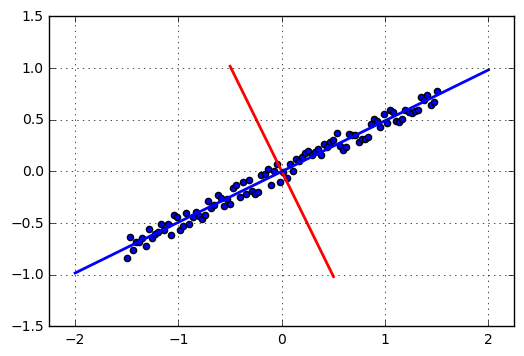

In [10]:
x1 = np.array([-0.5, 0.5])
f = v[0,:]
y1 = x1*f[0]/f[1]
plt.plot(x1, y1, 'r-', lw=2)

x2 = np.array([-2, 2])
f2 = v[1,:]
y2 = x2*f2[0]/f2[1]
plt.plot(x2, y2, 'b-', lw=2)

plt.scatter(xx[:,0:1],xx[:,1:2])
plt.axis('equal')
plt.grid(True)

In [11]:
zz = np.dot(xx[:,0:2], v)

(-2.0, 2.0, -1.0, 1.0)

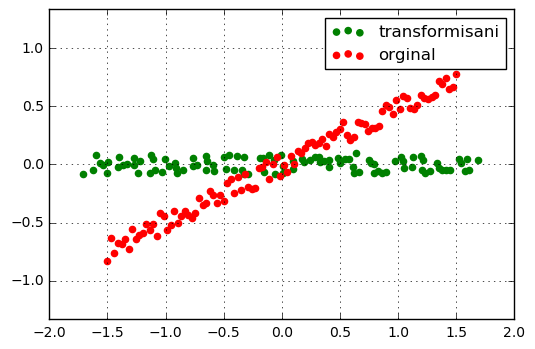

In [12]:
plt.scatter(zz[:,0:1],zz[:,1:2], color='g', label='transformisani')
plt.scatter(xx[:,0:1],xx[:,1:2], color='r', label='orginal')
plt.legend()
plt.grid(True)
plt.axis('equal')

In [13]:
zz[:,1] = 0
cc = np.dot(zz[:,0:2], v.T)

(-2.0, 2.0, -1.0, 1.0)

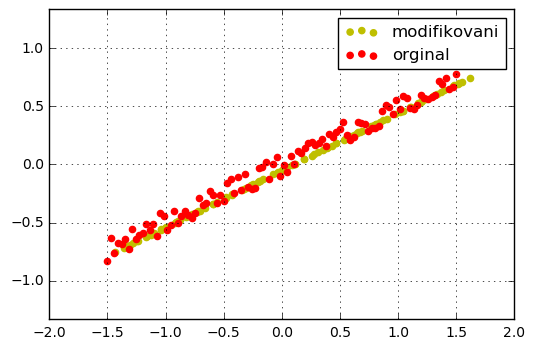

In [14]:
plt.scatter(cc[:,0:1]+0.1,cc[:,1:2], color='y', label='modifikovani')
plt.scatter(xx[:,0:1],xx[:,1:2], color='r', label='orginal')
plt.legend()
plt.grid(True)
plt.axis('equal')